In [33]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np


In [34]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [35]:
import cv2
import imghdr

In [36]:
path = 'E:\Self Deep Learning\Data'
data_dir = os.listdir(path)

In [37]:
sub_dir = 'happy'
sub_dir_path = os.path.join(path, sub_dir)

file_names = os.listdir(sub_dir_path)
file_names

['05-12-21-happy-people.jpg',
 '1000_F_176864699_2rY3V6rmOJ2EexazQGd1NnOnCherr6Sk.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '2560px-Happy_People.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'Duggar-Family-Secrets-Are-Exposed-in-New-Docuseries-Featuring-Jill-and-Amy-featured.png',
 'dv2051009.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.

In [38]:
img = cv2.imread('E:\Self Deep Learning\Data\happy\smile.woman_.jpg')
img.shape

(3844, 5125, 3)

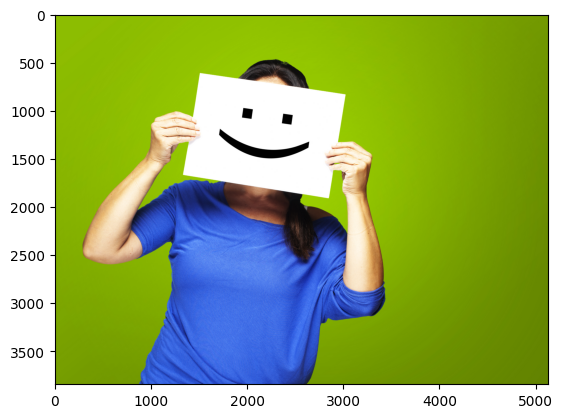

In [39]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
image_exts = ['jpeg','jpg','bmg','png']

In [41]:
for image_class in data_dir:  # Remove os.listdir() from the loop condition
    image_class_path = os.path.join(path, image_class)
    if os.path.isdir(image_class_path):
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
            try:
                img = cv2.imread(image_path)
                # Kiểm tra phần mở rộng của tệp ảnh
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, str(e)))

In [42]:
data_directory = 'E:\Self Deep Learning\Data'
data = tf.keras.utils.image_dataset_from_directory(data_directory)

Found 168 files belonging to 2 classes.


In [43]:
data_interator = data.as_numpy_iterator()

In [44]:
batch = data_interator.next()

In [45]:
batch[0].shape

(32, 256, 256, 3)

In [46]:
batch[1]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

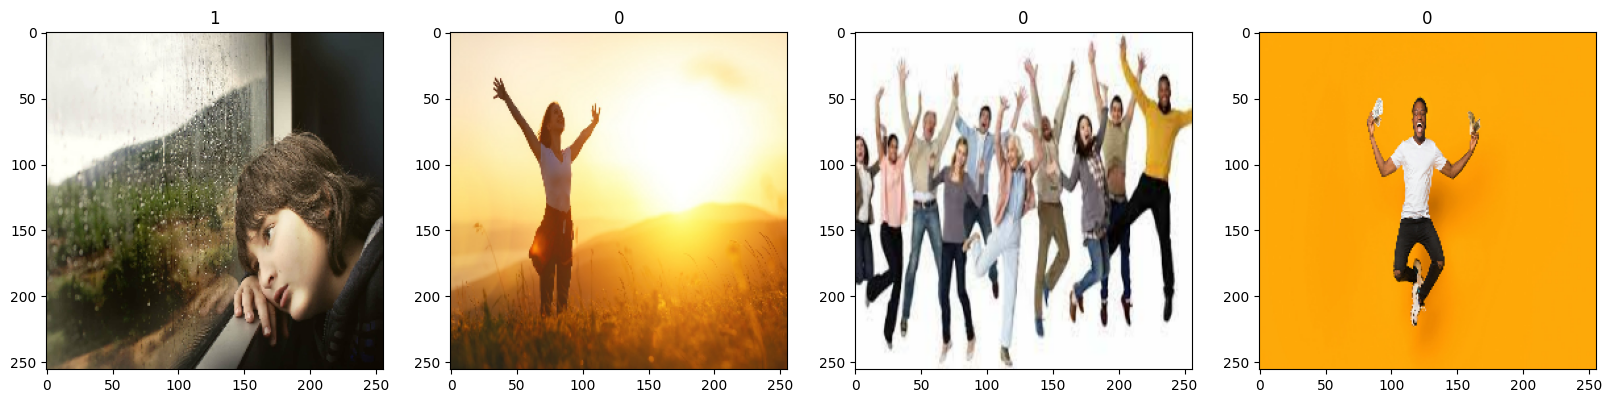

In [47]:
fig,ax = plt.subplots(ncols=4, figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax [idx].title.set_text(batch[1][idx])

In [48]:
scaled = batch[0]/255

In [49]:
scaled.max()

1.0

# 2. Preprocess Data

In [50]:
data = data.map(lambda x,y: (x/255,y))

In [51]:
scaled_iterator = data.as_numpy_iterator()

In [52]:
batch = scaled_iterator.next()

In [53]:
batch[0].max()

1.0

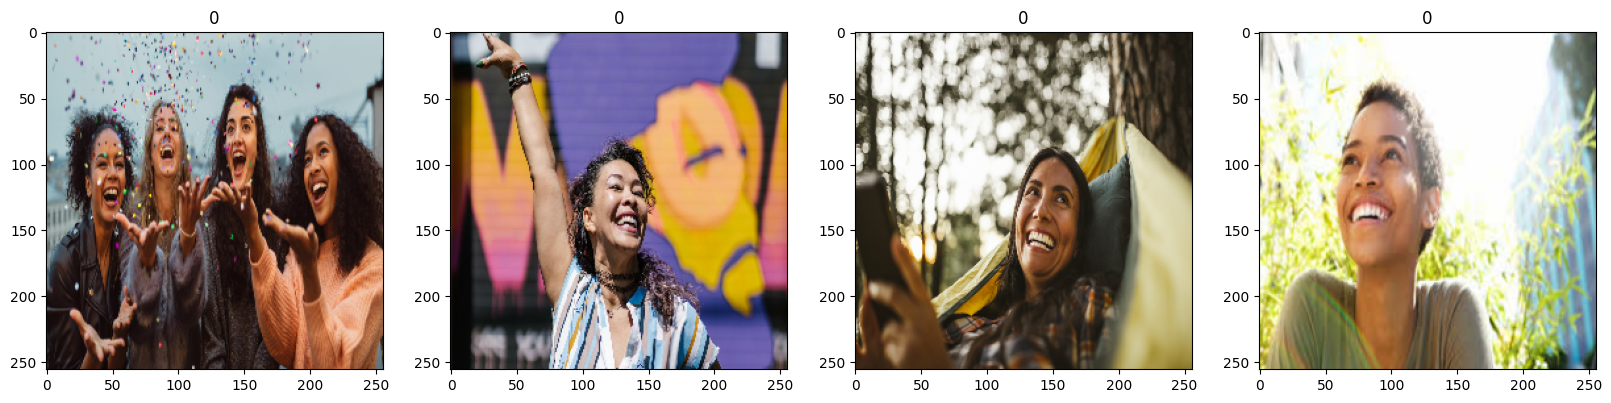

In [54]:
fig,ax = plt.subplots(ncols=4, figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax [idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [55]:
len(data)

6

In [56]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [57]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [58]:
len(test)

1

# 3. Deep Model

In [62]:
import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [63]:
model = Sequential()


In [64]:
model.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation ='sigmoid'))


In [65]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [67]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20


4/4 [==============================] - 14s 2s/step - loss: 2.4867 - accuracy: 0.5234 - val_loss: 1.3355 - val_accuracy: 0.2812
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.9041 - accuracy: 0.4453 - val_loss: 0.7263 - val_accuracy: 0.3750
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.7085 - accuracy: 0.4453 - val_loss: 0.6881 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.6736 - accuracy: 0.7422 - val_loss: 0.6042 - val_accuracy: 0.6250
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.6503 - accuracy: 0.5938 - val_loss: 0.6086 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.5733 - accuracy: 0.6953 - val_loss: 0.5825 - val_accuracy: 0.5938
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.5297 - accuracy: 0.7734 - val_loss: 0.3809 - val_accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 9

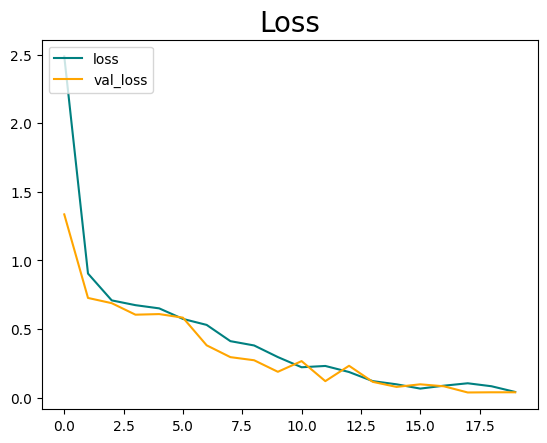

In [68]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange', label = 'val_loss')
plt.title('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()



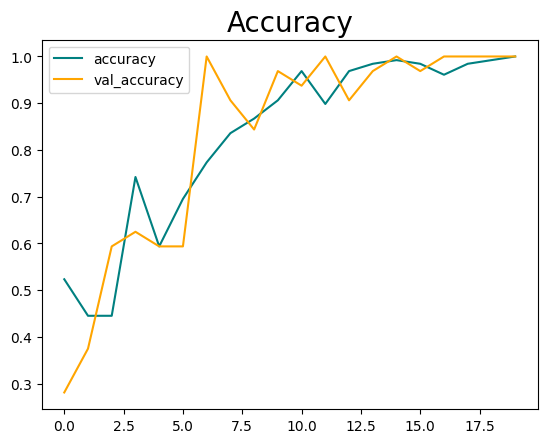

In [69]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange', label = 'val_accuracy')
plt.title('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()



# 4. Evaluate Performance

In [70]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [71]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [72]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 458ms/step


In [73]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### 4.2 Test

In [74]:
import cv2

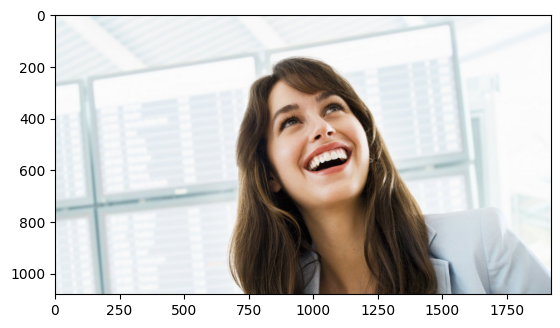

In [75]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

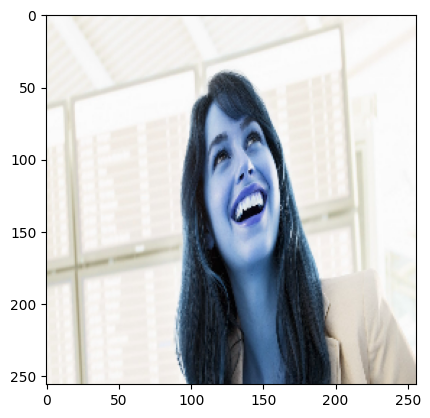

In [76]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [77]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 81ms/step


In [78]:
yhat

array([[0.38161275]], dtype=float32)

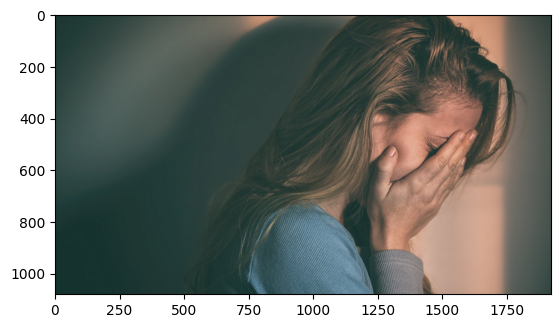

In [79]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

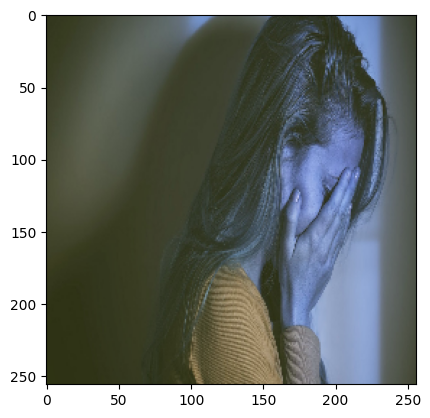

In [80]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [81]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 81ms/step


In [82]:
yhat

array([[0.7489225]], dtype=float32)

In [83]:
if yhat >0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')
 

Predicted class is Sad
